In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [327]:
df = pd.read_csv("data.csv", encoding="ISO-8859-1")

In [328]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [329]:
nRows, nCols = df.shape

In [330]:
print(f"Number of rows: {nRows}, Number of columns: {nCols}")

Number of rows: 541909, Number of columns: 8


In [331]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [332]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [333]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
latest_date = df.sort_values(by="InvoiceDate", ascending=False).iloc[0]["InvoiceDate"]
df["ChurnTime"] = latest_date - df["InvoiceDate"]
df["OrderValue"] = df["UnitPrice"] * df["Quantity"]

In [334]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ChurnTime,OrderValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373 days 04:24:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373 days 04:24:00,22.00


In [335]:
df.describe(percentiles=[.20, .40, .60, .80, .90, .99])

,Quantity,InvoiceDate,UnitPrice,CustomerID,ChurnTime,OrderValue
count,541909.000000,541909,541909.000000,406829.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,157 days 23:15:02.843613964,17.987795
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,0 days 00:00:00,-168469.600000
20%,1.000000,2011-03-03 13:45:00,0.850000,13536.000000,37 days 02:59:12,2.900000
40%,2.000000,2011-06-07 13:44:00,1.650000,14659.000000,95 days 23:35:00,6.300000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,142 days 19:33:00,9.750000
60%,5.000000,2011-09-04 13:15:00,2.550000,15805.000000,184 days 23:06:00,12.600000
80%,12.000000,2011-11-02 09:50:48,4.950000,17095.000000,280 days 23:05:00,19.800000
90%,24.000000,2011-11-21 16:02:48,7.950000,17719.000000,331 days 01:46:00,31.800000
99%,100.000000,2011-12-08 09:28:00,18.000000,18212.000000,371 days 01:37:00,180.000000


In [336]:
df = df.drop(["InvoiceNo", "StockCode"], axis=1)

In [337]:
frequency = df["CustomerID"].value_counts()

In [338]:
frequency

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [339]:
df_id_frequency = pd.DataFrame({"CustomerID":frequency.index, "frequency":frequency.values})

In [340]:
df_id_frequency

,CustomerID,frequency
0,17841.0,7983
1,14911.0,5903
2,14096.0,5128
3,12748.0,4642
4,14606.0,2782
...,...,...
4367,15070.0,1
4368,15753.0,1
4369,17065.0,1
4370,16881.0,1


In [341]:
df_id_frequency.set_index("CustomerID")

,frequency
CustomerID,
17841.0,7983
14911.0,5903
14096.0,5128
12748.0,4642
14606.0,2782
...,...
15070.0,1
15753.0,1
17065.0,1


In [342]:
df_id_frequency.describe(percentiles=[.20, .40, .60, .80, .90, .99])

,CustomerID,frequency
count,4372.000000,4372.000000
mean,15299.677722,93.053294
std,1722.390705,232.471608
min,12346.000000,1.000000
20%,13505.200000,14.000000
40%,14706.200000,29.000000
50%,15300.500000,42.000000
60%,15884.200000,58.000000
80%,17079.800000,124.000000
90%,17685.900000,212.000000


In [343]:
df.head(2)

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ChurnTime,OrderValue
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373 days 04:24:00,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00,20.34


In [344]:
df_numeric = df[["CustomerID", "OrderValue"]]

In [345]:
df_numeric

,CustomerID,OrderValue
0,17850.0,15.30
1,17850.0,20.34
2,17850.0,22.00
3,17850.0,20.34
4,17850.0,20.34
...,...,...
541904,12680.0,10.20
541905,12680.0,12.60
541906,12680.0,16.60
541907,12680.0,16.60


In [346]:
df_order_by_total_value_sum = df_numeric.groupby(by=["CustomerID"]).sum().groupby(level=[0]).cumsum()

In [347]:
df_order_by_total_value_sum

,OrderValue
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [348]:
df_order_by_total_value_sum.rename(columns={"OrderValue": "OrderTotalValue"}, inplace=True)

In [349]:
df_order_by_total_value_sum

,OrderTotalValue
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [350]:
df_oder_by_last_date = df.sort_values("InvoiceDate").groupby("CustomerID").last()

In [351]:
df_oder_by_last_date

,Description,Quantity,InvoiceDate,UnitPrice,Country,ChurnTime,OrderValue
CustomerID,,,,,,,
12346.0,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,United Kingdom,325 days 02:33:00,-77183.60
12347.0,RED TOADSTOOL LED NIGHT LIGHT,24,2011-12-07 15:52:00,1.65,Iceland,1 days 20:58:00,39.60
12348.0,POSTAGE,1,2011-09-25 13:13:00,40.00,Finland,74 days 23:37:00,40.00
12349.0,DOORMAT RED RETROSPOT,6,2011-11-21 09:51:00,8.25,Italy,18 days 02:59:00,49.50
12350.0,CHOCOLATE CALCULATOR,12,2011-02-02 16:01:00,1.65,Norway,309 days 20:49:00,19.80
...,...,...,...,...,...,...,...
18280.0,RETROSPOT LAMP,2,2011-03-07 09:52:00,9.95,United Kingdom,277 days 02:58:00,19.90
18281.0,PENNY FARTHING BIRTHDAY CARD,12,2011-06-12 10:53:00,0.42,United Kingdom,180 days 01:57:00,5.04
18282.0,ROSES REGENCY TEACUP AND SAUCER,6,2011-12-02 11:43:00,2.95,United Kingdom,7 days 01:07:00,17.70


In [352]:
df_oder_by_last_date.rename(columns={"InvoiceDate":"OrderLastDate"}, inplace=True)

In [353]:
df_oder_by_last_date = df_oder_by_last_date["OrderLastDate"]

In [354]:
df_oder_by_last_date = pd.DataFrame({"CustomerID":df_oder_by_last_date.index, "OrderLastDate": df_oder_by_last_date.values})

In [355]:
df_oder_by_last_date

,CustomerID,OrderLastDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00
...,...,...
4367,18280.0,2011-03-07 09:52:00
4368,18281.0,2011-06-12 10:53:00
4369,18282.0,2011-12-02 11:43:00
4370,18283.0,2011-12-06 12:02:00


In [356]:
df_id_frequency

,CustomerID,frequency
0,17841.0,7983
1,14911.0,5903
2,14096.0,5128
3,12748.0,4642
4,14606.0,2782
...,...,...
4367,15070.0,1
4368,15753.0,1
4369,17065.0,1
4370,16881.0,1


In [357]:
rfm_raw = df_oder_by_last_date.merge(df_order_by_total_value_sum, on="CustomerID")

In [358]:
rfm_raw = rfm_raw.merge(df_id_frequency, on="CustomerID")

In [359]:
rfm_raw

,CustomerID,OrderLastDate,OrderTotalValue,frequency
0,12346.0,2011-01-18 10:17:00,0.00,2
1,12347.0,2011-12-07 15:52:00,4310.00,182
2,12348.0,2011-09-25 13:13:00,1797.24,31
3,12349.0,2011-11-21 09:51:00,1757.55,73
4,12350.0,2011-02-02 16:01:00,334.40,17
...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,180.60,10
4368,18281.0,2011-06-12 10:53:00,80.82,7
4369,18282.0,2011-12-02 11:43:00,176.60,13
4370,18283.0,2011-12-06 12:02:00,2094.88,756


In [360]:
rfm_raw.describe(percentiles=[.20, .40, .60, .80, .90, .98])

,CustomerID,OrderLastDate,OrderTotalValue,frequency
count,4372.000000,4372,4372.000000,4372.000000
mean,15299.677722,2011-09-08 23:12:06.697163520,1898.459701,93.053294
min,12346.000000,2010-12-01 09:53:00,-4287.630000,1.000000
20%,13505.200000,2011-06-14 12:22:48,234.392000,14.000000
40%,14706.200000,2011-09-29 17:41:00,465.412000,29.000000
50%,15300.500000,2011-10-20 15:56:30,648.075000,42.000000
60%,15884.200000,2011-11-08 11:54:36,909.134000,58.000000
80%,17079.800000,2011-11-28 12:53:24,2002.092000,124.000000
90%,17685.900000,2011-12-05 12:03:54,3505.600000,212.000000
98%,18170.580000,2011-12-08 13:48:44.400000,10491.037000,497.900000


In [361]:
most_monetary = rfm_raw[rfm_raw["OrderTotalValue"] > 10000]

In [362]:
most_monetary = most_monetary.sort_values(by="OrderTotalValue", ascending=False)

In [363]:
most_monetary.sort_values(by="OrderLastDate")

,CustomerID,OrderLastDate,OrderTotalValue,frequency
2522,15749.0,2011-04-18 13:20:00,21535.90,15
2836,16180.0,2011-08-31 16:28:00,10217.48,176
50,12409.0,2011-09-22 10:38:00,11056.93,114
464,12939.0,2011-10-06 14:33:00,11581.80,47
756,13340.0,2011-10-25 13:15:00,10736.48,134
...,...,...,...,...
3215,16705.0,2011-12-09 12:08:00,13946.13,284
330,12748.0,2011-12-09 12:20:00,29072.10,4642
3854,17581.0,2011-12-09 12:21:00,10736.11,452
1067,13777.0,2011-12-09 12:25:00,25748.35,219


In [364]:
most_monetary

,CustomerID,OrderLastDate,OrderTotalValue,frequency
1703,14646.0,2011-12-08 12:12:00,279489.02,2085
4233,18102.0,2011-12-09 11:50:00,256438.49,433
3758,17450.0,2011-12-01 13:29:00,187482.17,351
1895,14911.0,2011-12-08 15:54:00,132572.62,5903
55,12415.0,2011-11-15 14:22:00,123725.45,778
...,...,...,...,...
2147,15251.0,2011-11-30 15:02:00,10327.11,121
2836,16180.0,2011-08-31 16:28:00,10217.48,176
3328,16843.0,2011-10-28 09:06:00,10183.82,379
4061,17865.0,2011-11-09 12:08:00,10158.54,389


In [365]:
rfm_raw["ChurnTime"] = latest_date - rfm_raw["OrderLastDate"]

In [366]:
rfm_raw

,CustomerID,OrderLastDate,OrderTotalValue,frequency,ChurnTime
0,12346.0,2011-01-18 10:17:00,0.00,2,325 days 02:33:00
1,12347.0,2011-12-07 15:52:00,4310.00,182,1 days 20:58:00
2,12348.0,2011-09-25 13:13:00,1797.24,31,74 days 23:37:00
3,12349.0,2011-11-21 09:51:00,1757.55,73,18 days 02:59:00
4,12350.0,2011-02-02 16:01:00,334.40,17,309 days 20:49:00
...,...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,180.60,10,277 days 02:58:00
4368,18281.0,2011-06-12 10:53:00,80.82,7,180 days 01:57:00
4369,18282.0,2011-12-02 11:43:00,176.60,13,7 days 01:07:00
4370,18283.0,2011-12-06 12:02:00,2094.88,756,3 days 00:48:00


In [367]:
rfm_raw.describe(percentiles=[.20, .40, .60, .80, .90, .95, .99])

,CustomerID,OrderLastDate,OrderTotalValue,frequency,ChurnTime
count,4372.000000,4372,4372.000000,4372.000000,4372
mean,15299.677722,2011-09-08 23:12:06.697163520,1898.459701,93.053294,91 days 13:37:53.302836231
min,12346.000000,2010-12-01 09:53:00,-4287.630000,1.000000,0 days 00:00:00
20%,13505.200000,2011-06-14 12:22:48,234.392000,14.000000,10 days 23:56:36
40%,14706.200000,2011-09-29 17:41:00,465.412000,29.000000,31 days 00:55:24
50%,15300.500000,2011-10-20 15:56:30,648.075000,42.000000,49 days 20:53:30
60%,15884.200000,2011-11-08 11:54:36,909.134000,58.000000,70 days 19:09:00
80%,17079.800000,2011-11-28 12:53:24,2002.092000,124.000000,178 days 00:27:12.000000002
90%,17685.900000,2011-12-05 12:03:54,3505.600000,212.000000,263 days 03:59:54
95%,17984.450000,2011-12-07 11:35:27,5625.004000,317.900000,312 days 01:42:09


In [368]:
churn_clients = rfm_raw[rfm_raw["ChurnTime"] > "50 days"]

In [369]:
churn_clients.sort_values(by="OrderTotalValue", ascending=False)

,CustomerID,OrderLastDate,OrderTotalValue,frequency,ChurnTime
2522,15749.0,2011-04-18 13:20:00,21535.90,15,234 days 23:30:00
464,12939.0,2011-10-06 14:33:00,11581.80,47,63 days 22:17:00
50,12409.0,2011-09-22 10:38:00,11056.93,114,78 days 02:12:00
2836,16180.0,2011-08-31 16:28:00,10217.48,176,99 days 20:22:00
198,12590.0,2011-06-02 14:25:00,9861.38,70,189 days 22:25:00
...,...,...,...,...,...
2578,15823.0,2011-01-06 12:58:00,-840.76,17,336 days 23:52:00
125,12503.0,2011-01-06 11:51:00,-1126.00,1,337 days 00:59:00
1384,14213.0,2010-12-03 09:47:00,-1192.20,5,371 days 03:03:00
2236,15369.0,2011-07-18 15:11:00,-1592.49,1,143 days 21:39:00


In [370]:
churn_clients_top100 = churn_clients.nlargest(100, ["OrderTotalValue"]).sort_values(by="OrderTotalValue", ascending=False)

In [371]:
churn_clients_top100

,CustomerID,OrderLastDate,OrderTotalValue,frequency,ChurnTime
2522,15749.0,2011-04-18 13:20:00,21535.90,15,234 days 23:30:00
464,12939.0,2011-10-06 14:33:00,11581.80,47,63 days 22:17:00
50,12409.0,2011-09-22 10:38:00,11056.93,114,78 days 02:12:00
2836,16180.0,2011-08-31 16:28:00,10217.48,176,99 days 20:22:00
198,12590.0,2011-06-02 14:25:00,9861.38,70,189 days 22:25:00
...,...,...,...,...,...
1064,13771.0,2011-10-06 14:18:00,2631.70,120,63 days 22:32:00
230,12625.0,2011-05-12 09:54:00,2614.32,91,211 days 02:56:00
390,12836.0,2011-10-11 15:10:00,2612.86,175,58 days 21:40:00
813,13422.0,2011-10-19 13:45:00,2601.55,128,50 days 23:05:00


In [372]:
rfm_raw

,CustomerID,OrderLastDate,OrderTotalValue,frequency,ChurnTime
0,12346.0,2011-01-18 10:17:00,0.00,2,325 days 02:33:00
1,12347.0,2011-12-07 15:52:00,4310.00,182,1 days 20:58:00
2,12348.0,2011-09-25 13:13:00,1797.24,31,74 days 23:37:00
3,12349.0,2011-11-21 09:51:00,1757.55,73,18 days 02:59:00
4,12350.0,2011-02-02 16:01:00,334.40,17,309 days 20:49:00
...,...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,180.60,10,277 days 02:58:00
4368,18281.0,2011-06-12 10:53:00,80.82,7,180 days 01:57:00
4369,18282.0,2011-12-02 11:43:00,176.60,13,7 days 01:07:00
4370,18283.0,2011-12-06 12:02:00,2094.88,756,3 days 00:48:00


In [373]:
churn_clients

,CustomerID,OrderLastDate,OrderTotalValue,frequency,ChurnTime
0,12346.0,2011-01-18 10:17:00,0.00,2,325 days 02:33:00
2,12348.0,2011-09-25 13:13:00,1797.24,31,74 days 23:37:00
4,12350.0,2011-02-02 16:01:00,334.40,17,309 days 20:49:00
6,12353.0,2011-05-19 17:47:00,89.00,4,203 days 19:03:00
7,12354.0,2011-04-21 13:11:00,1079.40,58,231 days 23:39:00
...,...,...,...,...,...
4359,18269.0,2010-12-16 15:39:00,138.90,8,357 days 21:11:00
4365,18277.0,2011-10-12 15:22:00,97.63,9,57 days 21:28:00
4366,18278.0,2011-09-27 11:58:00,173.90,9,73 days 00:52:00
4367,18280.0,2011-03-07 09:52:00,180.60,10,277 days 02:58:00


In [380]:
rfm_raw.describe(percentiles=[.20, .40, .60, .80, .90, .98])

,CustomerID,OrderLastDate,OrderTotalValue,frequency,ChurnTime,M
count,4372.000000,4372,4372.000000,4372.000000,4372,4372.000000
mean,15299.677722,2011-09-08 23:12:06.697163520,1898.459701,93.053294,91 days 13:37:53.302836231,0.022187
min,12346.000000,2010-12-01 09:53:00,-4287.630000,1.000000,0 days 00:00:00,0.000000
20%,13505.200000,2011-06-14 12:22:48,234.392000,14.000000,10 days 23:56:36,0.000000
40%,14706.200000,2011-09-29 17:41:00,465.412000,29.000000,31 days 00:55:24,0.000000
50%,15300.500000,2011-10-20 15:56:30,648.075000,42.000000,49 days 20:53:30,0.000000
60%,15884.200000,2011-11-08 11:54:36,909.134000,58.000000,70 days 19:09:00,0.000000
80%,17079.800000,2011-11-28 12:53:24,2002.092000,124.000000,178 days 00:27:12.000000002,0.000000
90%,17685.900000,2011-12-05 12:03:54,3505.600000,212.000000,263 days 03:59:54,0.000000
98%,18170.580000,2011-12-08 13:48:44.400000,10491.037000,497.900000,361 days 01:25:36,1.000000


In [379]:
rfm_raw["M"] = [1 if i > 10000 else 0 for i in rfm_raw.OrderTotalValue]

In [381]:
rfm_raw.loc[rfm_raw["OrderTotalValue"] <= 10000, "M"] = 2
rfm_raw.loc[rfm_raw["OrderTotalValue"] <= 3500, "M"] = 3
rfm_raw.loc[rfm_raw["OrderTotalValue"] <= 2000, "M"] = 4
rfm_raw.loc[rfm_raw["OrderTotalValue"] <= 900, "M"] = 5

In [384]:
rfm_raw.describe(percentiles=[.20, .40, .60, .80, .90, .98])

,CustomerID,OrderLastDate,OrderTotalValue,frequency,ChurnTime,M
count,4372.000000,4372,4372.000000,4372.000000,4372,4372.000000
mean,15299.677722,2011-09-08 23:12:06.697163520,1898.459701,93.053294,91 days 13:37:53.302836231,4.274474
min,12346.000000,2010-12-01 09:53:00,-4287.630000,1.000000,0 days 00:00:00,1.000000
20%,13505.200000,2011-06-14 12:22:48,234.392000,14.000000,10 days 23:56:36,3.000000
40%,14706.200000,2011-09-29 17:41:00,465.412000,29.000000,31 days 00:55:24,4.000000
50%,15300.500000,2011-10-20 15:56:30,648.075000,42.000000,49 days 20:53:30,5.000000
60%,15884.200000,2011-11-08 11:54:36,909.134000,58.000000,70 days 19:09:00,5.000000
80%,17079.800000,2011-11-28 12:53:24,2002.092000,124.000000,178 days 00:27:12.000000002,5.000000
90%,17685.900000,2011-12-05 12:03:54,3505.600000,212.000000,263 days 03:59:54,5.000000
98%,18170.580000,2011-12-08 13:48:44.400000,10491.037000,497.900000,361 days 01:25:36,5.000000


In [385]:
rfm_raw["F"] = [1 if i >= 400 else 0 for i in rfm_raw.frequency]

In [386]:
rfm_raw.loc[rfm_raw["frequency"] <= 400, "F"] = 2
rfm_raw.loc[rfm_raw["frequency"] <= 200, "F"] = 3
rfm_raw.loc[rfm_raw["frequency"] <= 100, "F"] = 4
rfm_raw.loc[rfm_raw["frequency"] <= 60, "F"] = 5

In [394]:
rfm_raw.describe(percentiles=[.20, .40, .60, .70, .80, .90, .95])

,CustomerID,OrderLastDate,OrderTotalValue,frequency,ChurnTime,M,F
count,4372.000000,4372,4372.000000,4372.000000,4372,4372.000000,4372.000000
mean,15299.677722,2011-09-08 23:12:06.697163520,1898.459701,93.053294,91 days 13:37:53.302836231,4.274474,4.216834
min,12346.000000,2010-12-01 09:53:00,-4287.630000,1.000000,0 days 00:00:00,1.000000,1.000000
20%,13505.200000,2011-06-14 12:22:48,234.392000,14.000000,10 days 23:56:36,3.000000,3.000000
40%,14706.200000,2011-09-29 17:41:00,465.412000,29.000000,31 days 00:55:24,4.000000,5.000000
50%,15300.500000,2011-10-20 15:56:30,648.075000,42.000000,49 days 20:53:30,5.000000,5.000000
60%,15884.200000,2011-11-08 11:54:36,909.134000,58.000000,70 days 19:09:00,5.000000,5.000000
70%,16479.700000,2011-11-18 12:24:06,1311.979000,85.000000,107 days 22:51:00,5.000000,5.000000
80%,17079.800000,2011-11-28 12:53:24,2002.092000,124.000000,178 days 00:27:12.000000002,5.000000,5.000000
90%,17685.900000,2011-12-05 12:03:54,3505.600000,212.000000,263 days 03:59:54,5.000000,5.000000


In [397]:
from datetime import timedelta

delta_5 = timedelta(days=300)
delta_4 = timedelta(days=250)
delta_3 = timedelta(days=180)
delta_2 = timedelta(days=100)
delta_1 = timedelta(days=50)


rfm_raw["R"] = [5 if i > delta_5 else 0 for i in rfm_raw.ChurnTime]

In [398]:
rfm_raw.loc[rfm_raw["ChurnTime"] <= delta_5, "R"] = 4
rfm_raw.loc[rfm_raw["ChurnTime"] <= delta_4, "R"] = 3
rfm_raw.loc[rfm_raw["ChurnTime"] <= delta_3, "R"] = 2
rfm_raw.loc[rfm_raw["ChurnTime"] <= delta_2, "R"] = 1

In [400]:
rfm_final = rfm_raw

In [401]:
rfm_final

,CustomerID,OrderLastDate,OrderTotalValue,frequency,ChurnTime,M,F,R
0,12346.0,2011-01-18 10:17:00,0.00,2,325 days 02:33:00,5,5,5
1,12347.0,2011-12-07 15:52:00,4310.00,182,1 days 20:58:00,2,3,1
2,12348.0,2011-09-25 13:13:00,1797.24,31,74 days 23:37:00,4,5,1
3,12349.0,2011-11-21 09:51:00,1757.55,73,18 days 02:59:00,4,4,1
4,12350.0,2011-02-02 16:01:00,334.40,17,309 days 20:49:00,5,5,5
...,...,...,...,...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,180.60,10,277 days 02:58:00,5,5,4
4368,18281.0,2011-06-12 10:53:00,80.82,7,180 days 01:57:00,5,5,3
4369,18282.0,2011-12-02 11:43:00,176.60,13,7 days 01:07:00,5,5,1
4370,18283.0,2011-12-06 12:02:00,2094.88,756,3 days 00:48:00,3,1,1


/tmp/ipykernel_91157/884084620.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm_final, x='R', palette='viridis', order=rfm_final['R'].value_counts().index)
/tmp/ipykernel_91157/884084620.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm_final, x='F', palette='viridis', order=rfm_final['F'].value_counts().index)
/tmp/ipykernel_91157/884084620.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm_final, x='M', palette='viridis', order=rfm_final['M'].value_counts().index)


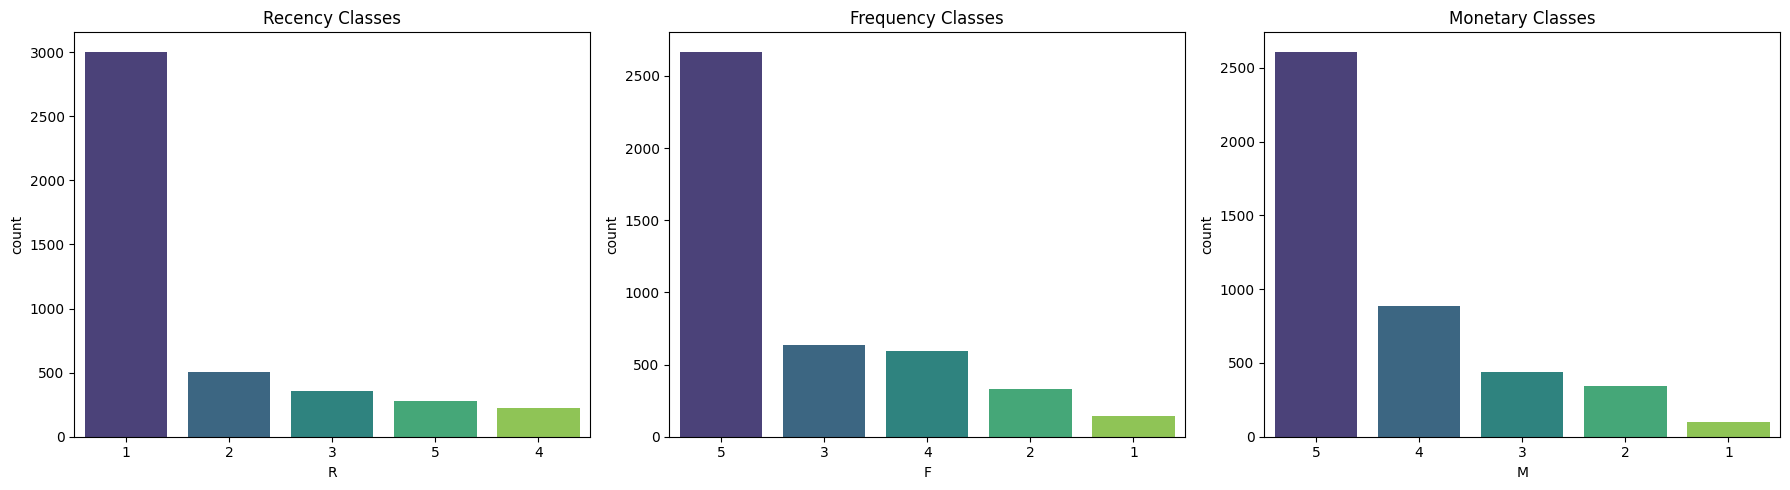

In [403]:
import seaborn as sns

# Создаем графики
plt.figure(figsize=(18, 5))

# Recency
plt.subplot(1, 3, 1)
sns.countplot(data=rfm_final, x='R', palette='viridis', order=rfm_final['R'].value_counts().index)
plt.title('Recency Classes')

# Frequency
plt.subplot(1, 3, 2)
sns.countplot(data=rfm_final, x='F', palette='viridis', order=rfm_final['F'].value_counts().index)
plt.title('Frequency Classes')

# Monetary
plt.subplot(1, 3, 3)
sns.countplot(data=rfm_final, x='M', palette='viridis', order=rfm_final['M'].value_counts().index)
plt.title('Monetary Classes')

plt.tight_layout()
plt.show()


In [426]:
rfm_final.to_csv("final.csv")